<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [386]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [387]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
import time

This function is to plot the confusion matrix.


In [388]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [389]:
import requests
import io
import pandas as pd

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the data
response = requests.get(URL1)

# Read the data into a pandas DataFrame
data = pd.read_csv(io.StringIO(response.text))


In [390]:
# Display the first few rows
print(data.head())

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [391]:
# Define the URL
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Fetch the data
response = requests.get(URL2)

# Convert the response content to a file-like object
da = io.StringIO(response.text)

# Load the data into a Pandas DataFrame
X = pd.read_csv(da)


In [392]:
# Display the first few rows
print(X.head(100))

    FlightNumber   PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0            1.0   6104.959412      1.0    1.0          0.0          0.0   
1            2.0    525.000000      1.0    1.0          0.0          0.0   
2            3.0    677.000000      1.0    1.0          0.0          0.0   
3            4.0    500.000000      1.0    1.0          0.0          0.0   
4            5.0   3170.000000      1.0    1.0          0.0          0.0   
..           ...           ...      ...    ...          ...          ...   
85          86.0  15400.000000      2.0    5.0          2.0          0.0   
86          87.0  15400.000000      3.0    5.0          2.0          0.0   
87          88.0  15400.000000      6.0    5.0          5.0          0.0   
88          89.0  15400.000000      3.0    5.0          2.0          0.0   
89          90.0   3681.000000      1.0    5.0          0.0          0.0   

    Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  ...  Serial_B1058  \
0         0.0     

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [393]:
Y=data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [394]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [395]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

we can see we only have 18 test samples.


In [396]:
Y_test.shape

(18,)

In [397]:
#Creating an df for storing each model's accuracy
df_acc = pd.DataFrame({
    'label': ['Log. Regression', 'SVC', 'Tree', 'KNN'],
    'train_acc': [None] * 4,  # Initialize with None or empty values
    'test_acc': [None] * 4,
    'test_tm': [None] * 4
})

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [398]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [399]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr,param_grid=parameters,cv=10)
# Record start time
start_time = time.time()
logreg_cv.fit(X_train, Y_train)
# Record end time
end_time = time.time()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [400]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
# Assume you have the best training accuracy value (e.g., 0.95)
logreg_train_acc = logreg_cv.best_score_
# Update the 'train_acc' column with this value
df_acc.loc[0, 'train_acc'] = logreg_train_acc
# Calculate elapsed time
logreg_elapsed_time = end_time - start_time
print(f"GridSearchCV took {logreg_elapsed_time:.6f} seconds to complete.")
df_acc.loc[0, 'test_tm'] = logreg_elapsed_time

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713
GridSearchCV took 0.067908 seconds to complete.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [401]:
accuracy_log = logreg_cv.score(X_test, Y_test)
print('Log. Reg. Accuracy:',accuracy_log)
# Update the 'test_acc' column with this value
df_acc.loc[0,'test_acc'] = accuracy_log

Log. Reg. Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


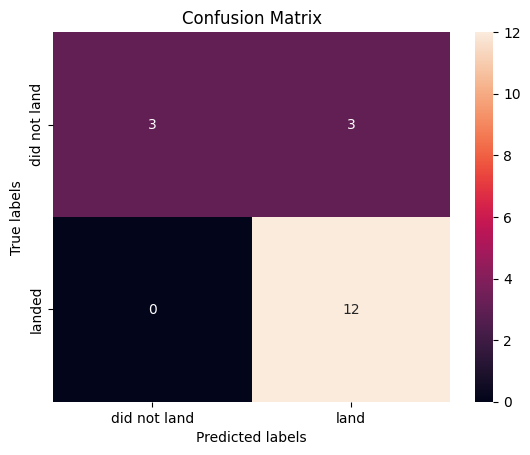

In [402]:
yhat_logreg=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_logreg)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [403]:
parameters1 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [404]:
svm_cv = GridSearchCV(estimator=svm,param_grid=parameters1,cv=10)
# Record start time
start_time = time.time()
svm_cv.fit(X_train, Y_train)
# Record end time
end_time = time.time()

In [405]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("SVM accuracy :",svm_cv.best_score_)
# Assume you have the best training accuracy value (e.g., 0.95)
svm_train_acc = svm_cv.best_score_
# Update the 'train_acc' column with this value
df_acc.loc[1, 'train_acc'] = svm_train_acc
# Calculate elapsed time
svm_elapsed_time = end_time - start_time
print(f"GridSearchCV took {svm_elapsed_time:.6f} seconds to complete.")
df_acc.loc[1, 'test_tm'] = svm_elapsed_time

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
SVM accuracy : 0.8482142857142856
GridSearchCV took 1.723315 seconds to complete.


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [406]:
accuracy_SVM = svm_cv.score(X_test, Y_test)
print('SVM Accuracy:',accuracy_SVM)
# Update the 'test_acc' column with this value
df_acc.loc[1,'test_acc'] = accuracy_SVM

SVM Accuracy: 0.8333333333333334


We can plot the confusion matrix


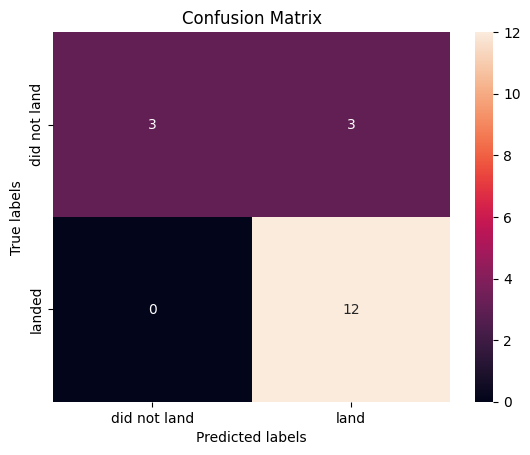

In [407]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [408]:
parameters2 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [409]:
tree_cv = GridSearchCV(estimator=tree,param_grid=parameters2,cv=10)
# Record start time
start_time = time.time()
tree_cv.fit(X_train, Y_train)
# Record end time
end_time = time.time()

C:\Users\razgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\razgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\razgr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

In [410]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
# Assume you have the best training accuracy value (e.g., 0.95)
tree_train_acc = tree_cv.best_score_
# Update the 'train_acc' column with this value
df_acc.loc[2, 'train_acc'] = tree_train_acc
# Calculate elapsed time
tree_elapsed_time = end_time - start_time
print(f"GridSearchCV took {tree_elapsed_time:.6f} seconds to complete.")
df_acc.loc[2, 'test_tm'] = tree_elapsed_time

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8857142857142856
GridSearchCV took 5.617139 seconds to complete.


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [411]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print('Tree Accuracy:',accuracy_tree)
# Update the 'test_acc' column with this value
df_acc.loc[2,'test_acc'] = accuracy_tree

Tree Accuracy: 0.8333333333333334


We can plot the confusion matrix


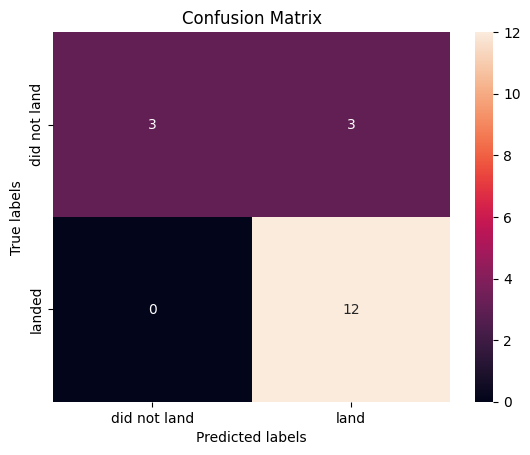

In [412]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [413]:
parameters3 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [414]:
knn_cv = GridSearchCV(estimator=KNN,param_grid=parameters3,cv=10)
# Record start time
start_time = time.time()
knn_cv.fit(X_train, Y_train)
# Record end time
end_time = time.time()

In [415]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
# Assume you have the best training accuracy value (e.g., 0.95)
knn_train_acc = knn_cv.best_score_
# Update the 'train_acc' column with this value
df_acc.loc[3, 'train_acc'] = knn_train_acc
# Calculate elapsed time
knn_elapsed_time = end_time - start_time
print(f"GridSearchCV took {knn_elapsed_time:.6f} seconds to complete.")
df_acc.loc[3, 'test_tm'] = knn_elapsed_time

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858
GridSearchCV took 2.597537 seconds to complete.


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [416]:
accuracy_knn = knn_cv.score(X_test, Y_test)
print('KNN Accuracy:',accuracy_knn)
# Update the 'test_acc' column with this value
df_acc.loc[3,'test_acc'] = accuracy_knn

KNN Accuracy: 0.8333333333333334


We can plot the confusion matrix


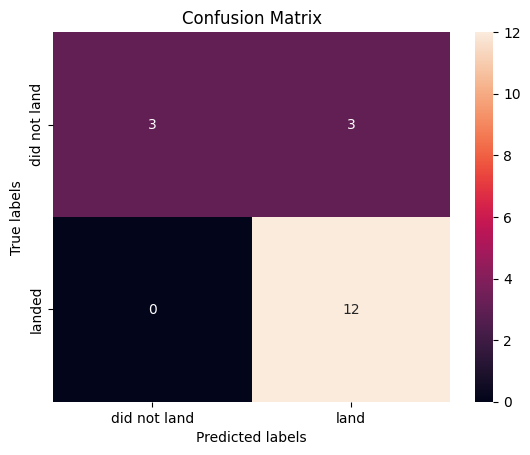

In [417]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)


## TASK  12


Find the method performs best:


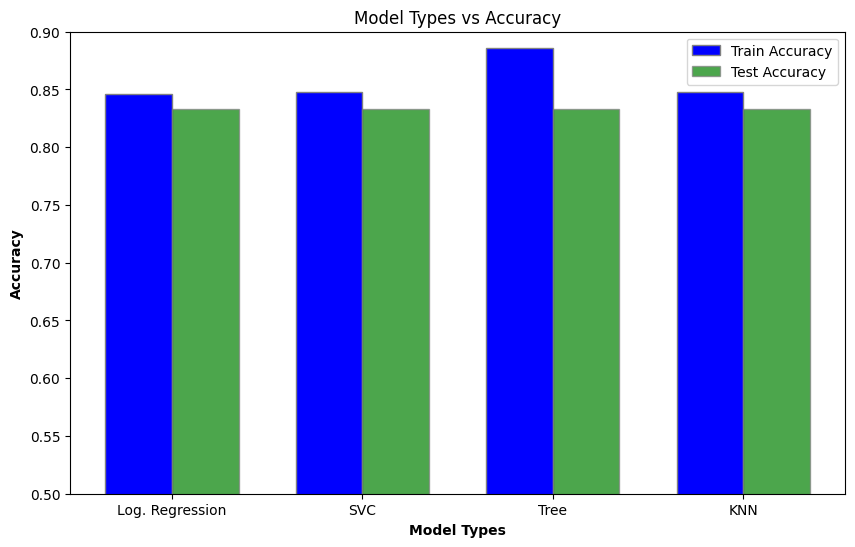

In [418]:
# Set the width of the bars
bar_width = 0.35

labels = df_acc['label']
train_acc = df_acc['train_acc']
test_acc = df_acc['test_acc']

# Set the position of each bar on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))  # Optional: Set figure size

# Create bar plot for train accuracy
plt.bar(r1, train_acc, color='b', width=bar_width, edgecolor='grey', label='Train Accuracy')

# Create bar plot for test accuracy
plt.bar(r2, test_acc, color='g', width=bar_width, edgecolor='grey', label='Test Accuracy', alpha=0.7)

# Add labels and title
plt.xlabel('Model Types', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Model Types vs Accuracy')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels, rotation=0)

# Set y-axis limits from 0 to 1
plt.ylim(0.5, 0.9)

# Add a legend to differentiate between train and test accuracy
plt.legend()

# Show plot
plt.show()

In [419]:
from sklearn.metrics import classification_report
report_logreg = classification_report(Y_test, yhat_logreg)
print('Log. Reg.:',report_logreg)
report_svm = classification_report(Y_test, yhat_svm)
print('SVM:',report_svm)
report_tree = classification_report(Y_test, yhat_tree)
print('Tree:',report_tree)
report_knn = classification_report(Y_test, yhat_knn)
print('KNN:',report_knn)

Log. Reg.:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

SVM:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Tree:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        1

In [420]:
df_acc

,label,train_acc,test_acc,test_tm
0,Log. Regression,0.846429,0.833333,0.067908
1,SVC,0.848214,0.833333,1.723315
2,Tree,0.885714,0.833333,5.617139
3,KNN,0.848214,0.833333,2.597537


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
